# 만족도 항목 별 상관관계

데이터준비

In [1]:
#로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package 를 import하기
from google.colab import files
import io
import pandas as pd
import numpy as np

#files.upload()에 의해 [파일 선택]버튼이 생성됨
uploaded = files.upload()

In [2]:
#read_csv()로 업로드된 파일을 Byte단위로 읽어서 데이터 프레임을 생성함
data = pd.read_csv(io.BytesIO(uploaded['airline_passenger_satisfaction.csv']))
# data = pd.read_csv('airline_passenger_satisfaction(age_group).csv')
# #train 데이터 프레임의 기본 정보 확인하기
# data.info()

In [4]:
# Gender 열의 값을 숫자로 변환
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

# Customer Type 열의 값을 숫자로 변환
data['Customer_Type'] = data['Customer_Type'].replace({'Loyal': 0, 'disloyal': 1})

# Type of Travel 열의 값을 숫자로 변환
data['Type_of_Travel'] = data['Type_of_Travel'].replace({'P': 0, 'B': 1})

# Class 열의 값을 숫자로 변환
data['Class'] = data['Class'].replace({'Business': 0, 'Eco': 1, 'Eco Plus': 2})

#satisfaction 변환
data['satisfaction'] = data['satisfaction'].replace({'D':0, 'S':1})

# 변환된 데이터 확인
print(data.head())

   id  Gender  age_group  Customer_Type  Type_of_Travel  Class  \
0   1       1          3              1               1      0   
1   2       0          2              0               1      0   
2   3       1          3              0               1      0   
3   4       1          4              0               1      0   
4   5       0          3              0               1      0   

   Flight_Distance  Departure_Delay  Arrival_Delay  Inflight_wifi_service  \
0              821                2              5                      3   
1              821               26             39                      2   
2              853                0              0                      4   
3             1905                0              0                      2   
4             3470                0              1                      3   

   ...  Online_boarding  Seat_comfort  Inflight_entertainment  \
0  ...                3             5                       5   
1  ...    

#  만족도 항목별 상관관계

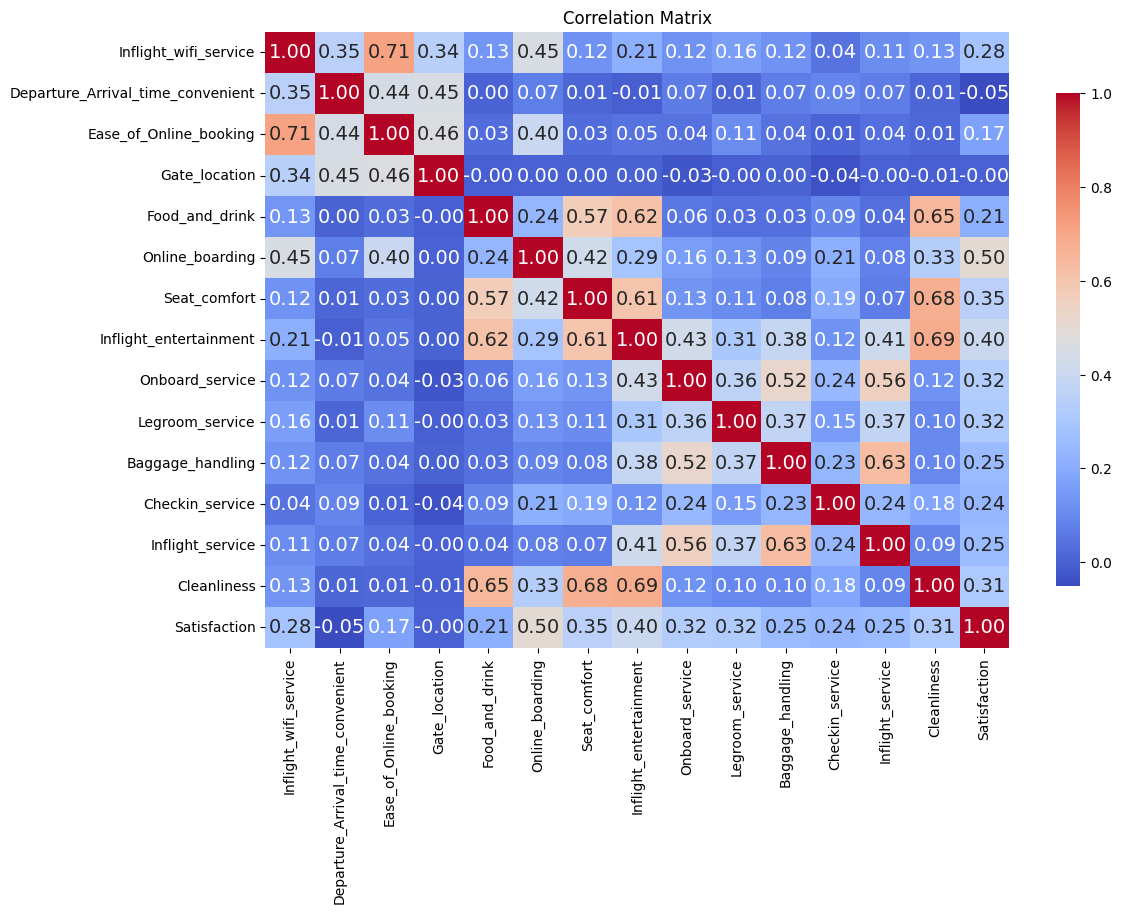

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 분석 - 고객, 출발/도착 지연시간  & 와이파이 서비스
correlation_matrix = data[['Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service','Legroom_service','Baggage_handling','Checkin_service', 'Inflight_service', 'Cleanliness', 'satisfaction' ]].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

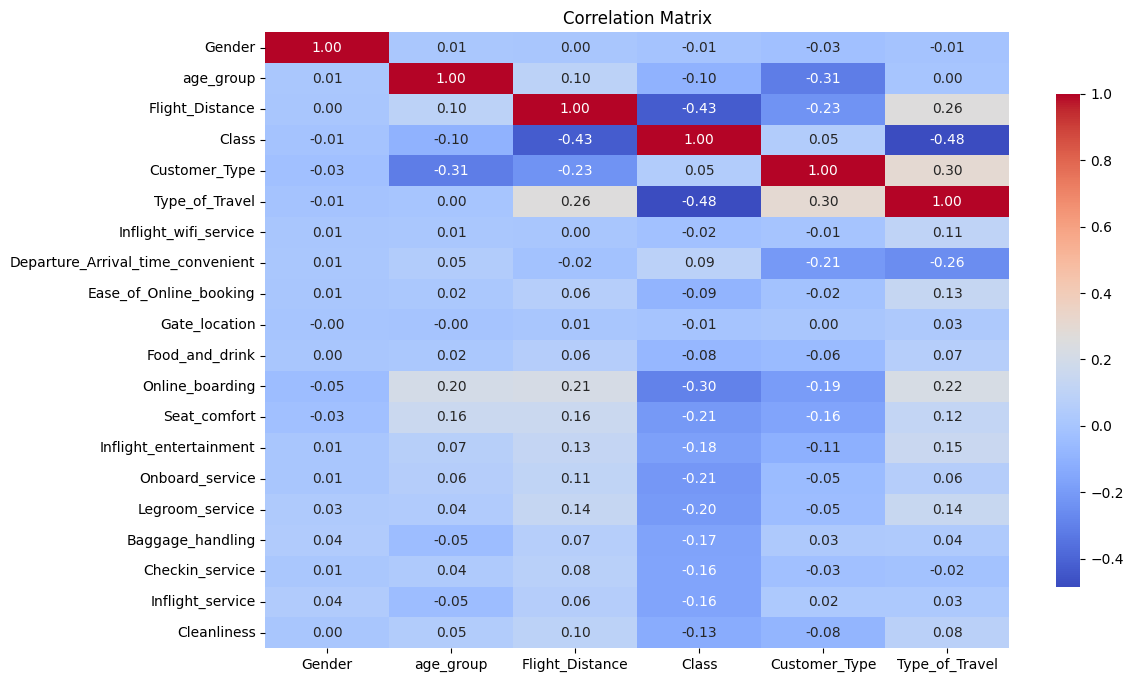

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 분석 - 모든 열
correlation_matrix = data[['Gender', 'age_group', 'Flight_Distance', 'Class', 'Customer_Type', 'Type_of_Travel', 'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']].corr()

# 원하는 가로 열 선택
customer_info_columns = ['Gender', 'age_group', 'Flight_Distance', 'Class', 'Customer_Type', 'Type_of_Travel']
selected_correlation_matrix = correlation_matrix[customer_info_columns]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 절댓값이 0.3보다 큰 상관관계를 가지는 변수 쌍 찾기
strong_correlations = correlation_matrix[((correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)) & (correlation_matrix != 1)]

strong_correlations_stack = strong_correlations.stack().reset_index()
strong_correlations_stack.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlations_stack['Absolute Correlation'] = strong_correlations_stack['Correlation'].abs()
strong_correlations_stack = strong_correlations_stack.sort_values('Absolute Correlation', ascending=False)
strong_correlations_stack = strong_correlations_stack.drop('Absolute Correlation', axis=1)

print(strong_correlations_stack.to_string(index=False))

                       Variable 1                        Variable 2  Correlation
            Inflight_wifi_service            Ease_of_Online_booking     0.714807
           Ease_of_Online_booking             Inflight_wifi_service     0.714807
                      Cleanliness            Inflight_entertainment     0.692511
           Inflight_entertainment                       Cleanliness     0.692511
                     Seat_comfort                       Cleanliness     0.679613
                      Cleanliness                      Seat_comfort     0.679613
                      Cleanliness                    Food_and_drink     0.658054
                   Food_and_drink                       Cleanliness     0.658054
                 Inflight_service                  Baggage_handling     0.629237
                 Baggage_handling                  Inflight_service     0.629237
                   Food_and_drink            Inflight_entertainment     0.623461
           Inflight_entertai